In [1]:
pacman::p_load(tidyverse, tm, stringr,NLP, RColorBrewer, wordcloud, Matrix, recommenderlab, slam, data.table, rARPACK, recosystem)

In [2]:
setwd('C:/Users/nchandra/OneDrive - National University of Singapore/CARecSys')

In [3]:
#memory.limit(size=64000)

In [4]:
memory.limit()

[1] 50000

In [5]:
df <- fread("./Data/amazon/Reviews.csv", sep = ",", header= TRUE)

In [6]:
tail(df)

Id     ProductId  UserId         ProfileName              
1 568449 B001EO7N10 A1F6BHEYB7R6R7 James Braley             
2 568450 B001EO7N10 A28KG5XORO54AY Lettie D. Carter         
3 568451 B003S1WTCU A3I8AFVPEE8KI5 R. Sawyer                
4 568452 B004I613EE A121AA1GQV751Z pksd ""pk_007""          
5 568453 B004I613EE A3IBEVCTXKNOH  Kathy A. Welch ""katwel""
6 568454 B001LR2CU2 A3LGQPJCZVL9UC srfell17                 
  HelpfulnessNumerator HelpfulnessDenominator Score Time      
1 0                    0                      5     1308096000
2 0                    0                      5     1299628800
3 0                    0                      2     1331251200
4 2                    2                      5     1329782400
5 1                    1                      5     1331596800
6 0                    0                      5     1338422400
  Summary                           
1 Very large ground spice jars.     
2 Will not do without               
3 disappointed                      
4 Perfect for our maltipoo          
5 Favorite Training and reward treat
6 Great Honey                       
  Text                                                                                                                                                                                                                                                                                                                                                                                  
1 My only complaint is that there's so much of it, I don't use a huge amount of 5 spice, so I gave 1 jar to my sister. Good enough.                                                                                                                                                                                                                                                     
2 Great for sesame chicken..this is a good if not better than resturants I have eaten at..My husband loved it..will find other recipes to use this in..                                                                                                                                                                                                                                 
3 I'm disappointed with the flavor. The chocolate notes are especially weak. Milk thickens it but the flavor still disappoints. This was worth a try but I'll never buy again. I will use what's left, which will be gone in no time thanks to the small cans.                                                                                                                          
4 These stars are small, so you can give 10-15 of those in one training session.  I tried to train our dog with ""Ceaser dog treats"",  it just made our puppy hyper.  If you compare the ingredients, you will know why.  Little stars has just basic food ingredients without any preservatives and food coloring.  Sweet potato flavor also did not make my hand smell like dog food.
5 These are the BEST treats for training and rewarding your dog for being good while grooming.  Lower in calories and loved by all the doggies.  Sweet potatoes seem to be their favorite Wet Noses treat!                                                                                                                                                                              
6 I am very satisfied ,product is as advertised, I use it on cereal, with raw vinegar, and as a general sweetner.

In [7]:
str(df)

Classes 'data.table' and 'data.frame':	568454 obs. of  10 variables:
 $ Id                    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ ProductId             : chr  "B001E4KFG0" "B00813GRG4" "B000LQOCH0" "B000UA0QIQ" ...
 $ UserId                : chr  "A3SGXH7AUHU8GW" "A1D87F6ZCVE5NK" "ABXLMWJIXXAIN" "A395BORC6FGVXV" ...
 $ ProfileName           : chr  "delmartian" "dll pa" "Natalia Corres \"\"Natalia Corres\"\"" "Karl" ...
 $ HelpfulnessNumerator  : int  1 0 1 3 0 0 0 0 1 0 ...
 $ HelpfulnessDenominator: int  1 0 1 3 0 0 0 0 1 0 ...
 $ Score                 : int  5 1 4 2 5 4 5 5 5 5 ...
 $ Time                  : int  1303862400 1346976000 1219017600 1307923200 1350777600 1342051200 1340150400 1336003200 1322006400 1351209600 ...
 $ Summary               : chr  "Good Quality Dog Food" "Not as Advertised" "\"\"Delight\"\" says it all" "Cough Medicine" ...
 $ Text                  : chr  "I have bought several of the Vitality canned dog food products and have found them all to be of good qua

In [8]:
reviews <- as.data.frame(df)

In [9]:
head(reviews,3)

Id ProductId  UserId         ProfileName                      
1 1  B001E4KFG0 A3SGXH7AUHU8GW delmartian                       
2 2  B00813GRG4 A1D87F6ZCVE5NK dll pa                           
3 3  B000LQOCH0 ABXLMWJIXXAIN  Natalia Corres ""Natalia Corres""
  HelpfulnessNumerator HelpfulnessDenominator Score Time      
1 1                    1                      5     1303862400
2 0                    0                      1     1346976000
3 1                    1                      4     1219017600
  Summary                
1 Good Quality Dog Food  
2 Not as Advertised      
3 ""Delight"" says it all
  Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1 I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.                                                                                                                                                                                                                                                        
2 Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".                                                                                                                                                                                                                                                                                                                               
3 This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.

In [10]:
reviews$UserId <- str_replace_all(reviews$UserId, '#oc-', '' )

In [11]:
# remove duplicated UsedId and ProductId
reviews <- reviews[!duplicated(reviews[,c(2,3)]),]

In [12]:
# Select needed columns, ProductId, Id, UserId, ProfileName, Score, Summary, Text, count, mean_score
reviews2 <- reviews[,c(1:4, 7, 9:10)]

In [13]:
reviews2 <- reviews2 %>%
    mutate(combine_summary = paste(Summary, Text))

In [14]:
nrow(reviews2[duplicated(reviews2$combine_summary),])

[1] 167327

In [15]:
reviews2 <- reviews2[!duplicated(reviews2$combine_summary),]

In [16]:
head(reviews2)

Id ProductId  UserId         ProfileName                       Score
1 1  B001E4KFG0 A3SGXH7AUHU8GW delmartian                        5    
2 2  B00813GRG4 A1D87F6ZCVE5NK dll pa                            1    
3 3  B000LQOCH0 ABXLMWJIXXAIN  Natalia Corres ""Natalia Corres"" 4    
4 4  B000UA0QIQ A395BORC6FGVXV Karl                              2    
5 5  B006K2ZZ7K A1UQRSCLF8GW1T Michael D. Bigham ""M. Wassir""   5    
6 6  B006K2ZZ7K ADT0SRK1MGOEU  Twoapennything                    4    
  Summary                
1 Good Quality Dog Food  
2 Not as Advertised      
3 ""Delight"" says it all
4 Cough Medicine         
5 Great taffy            
6 Nice Taffy             
  Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1 I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.                                                                                                                                                                                                                                                        
2 Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".                                                                                                                                                                                                                                                                                                                               
3 This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.
4 If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.                                                                                                                                                                                                                                                                                                    
5 Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.                                                                                                                                                                                                                                                                                                                                                                                   
6 I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavo

In [17]:
p_count <- reviews2 %>%
    group_by(ProductId) %>%
    summarize(count = n()) %>%
    arrange(-count)

In [18]:
p_count

ProductId  count
1     B007JFMH8M 912  
2     B003B3OOPA 623  
3     B002QWP89S 609  
4     B001EO5Q64 566  
5     B000KV61FC 555  
6     B0013NUGDE 549  
7     B000NMJWZO 542  
8     B0090X8IPM 530  
9     B005K4Q37A 524  
10    B000UBD88A 513  
11    B005ZBZLT4 504  
12    B006MONQMC 491  
13    B002IEZJMA 486  
14    B000PDY3P0 485  
15    B002IEVJRY 485  
16    B001VJ0B0I 479  
17    B002LANN56 464  
18    B007TJGY46 456  
19    B0041NYV8E 452  
20    B004SRH2B6 436  
21    B003VXFK44 419  
22    B0007A0AQW 412  
23    B000GAT6NG 388  
24    B005HG9ESG 386  
25    B003TNANSO 378  
26    B0051COPH6 378  
27    B003D4F1QS 372  
28    B0018KR8V0 369  
29    B003QNJYXM 366  
30    B008J1HO4C 356  
...   ...        ...  
67709 B009JMD4YY 1    
67710 B009JYEBS0 1    
67711 B009JZBS3U 1    
67712 B009K7YUDM 1    
67713 B009KOHGEK 1    
67714 B009KPU6LO 1    
67715 B009KUFALA 1    
67716 B009L8MUD2 1    
67717 B009L90JNY 1    
67718 B009LRLB6U 1    
67719 B009LSMTWE 1    
67720 B009M6W5UQ 1    
67721 B009MQVNW2 1    
67722 B009MRNOR8 1    
67723 B009O753WA 1    
67724 B009O7B1I0 1    
67725 B009O7DGEW 1    
67726 B009OY38SY 1    
67727 B009P4KMZA 1    
67728 B009PCDDO4 1    
67729 B009PG8MVO 1    
67730 B009PIAFTE 1    
67731 B009PICJTS 1    
67732 B009PIEW3O 1    
67733 B009RE0Y5G 1    
67734 B009SF0TN6 1    
67735 B009SR4OQ2 1    
67736 B009UOFU20 1    
67737 B009WSNWC4 1    
67738 B009WVB40S 1

In [19]:
reviews2 <- merge(reviews2, p_count, by.x = 'ProductId', by.y = 'ProductId', all.x = T)

In [20]:
head(reviews2)

ProductId  Id     UserId        
1 0006641040 150493 AMX0PJKV4PPNJ 
2 0006641040 150494 AYZ0PR5QZROD1 
3 0006641040 150495 A2QXYSXGQ2PKAU
4 0006641040 150496 A3KKR87BJ0C595
5 0006641040 150497 A1HKYQOFC8ZZCH
6 0006641040 150498 A3SJWISOCP31TR
  ProfileName                                     Score
1 E. R. Bird ""Ramseelbird""                      4    
2 Mother of 3 girls                               5    
3 Support for Providers                           3    
4 Gretchen Goodfellow ""Lover of children's lit"" 5    
5 Maria Apolloni ""lanarossa""                    1    
6 R. J. Wells                                     5    
  Summary                                                    
1 Read it once. Read it twice. Reading Chicken Soup With Rice
2 Family favorite                                            
3 Disappointed                                               
4 You'll use it once, you'll use it twice                    
5 The story is great, the softcover book is disappointing    
6 A Gem of a Book                                            
  Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [21]:
#median count of product
median_count <- median(reviews2$count)
median_count

[1] 17

In [22]:
#only keep product with more than median reviews
review_final <- reviews2 %>%
    filter(count >= median_count)
    

In [23]:
dim(review_final)

[1] 198715      9

In [24]:
# Most reviewed product
review_final %>%
    group_by(ProductId) %>%
    summarize(count = n()) %>%
    arrange(-count) %>%
    head()

ProductId  count
1 B007JFMH8M 912  
2 B003B3OOPA 623  
3 B002QWP89S 609  
4 B001EO5Q64 566  
5 B000KV61FC 555  
6 B0013NUGDE 549

In [25]:
# Unique user
length(unique(review_final$UserId))

[1] 139699

In [26]:
# Unique product
length(unique(review_final$ProductId))

[1] 4301

##### Subset of Data - 1st 50k for Our Project

In [27]:
# subset to 1st 50k data only for this project
review_final_small <- review_final[1:50000,]

In [28]:
# remove earlier count done at full dataset
review_final_small$count = NULL

In [29]:
# Re run review Count for each product in the subset only
p_count <- review_final_small %>%
    group_by(ProductId) %>%
    summarize(count = n()) %>%
    arrange(-count)

In [30]:
# Mean score for each product
mean_score <- review_final_small %>%
    group_by(ProductId) %>%
    summarize(mean_score = mean(Score))

In [31]:
# merge p_count to reviews2
review_final_small <- merge(review_final_small, p_count, by.x = 'ProductId', by.y = 'ProductId', all.x = TRUE)

In [32]:
# merge mean_score to reviews2
reviews_final_small <- merge(review_final_small, mean_score, by.x = 'ProductId', by.y = 'ProductId', all.x = TRUE)

In [33]:
head(review_final_small)

ProductId  Id     UserId        
1 0006641040 150493 AMX0PJKV4PPNJ 
2 0006641040 150494 AYZ0PR5QZROD1 
3 0006641040 150495 A2QXYSXGQ2PKAU
4 0006641040 150496 A3KKR87BJ0C595
5 0006641040 150497 A1HKYQOFC8ZZCH
6 0006641040 150498 A3SJWISOCP31TR
  ProfileName                                     Score
1 E. R. Bird ""Ramseelbird""                      4    
2 Mother of 3 girls                               5    
3 Support for Providers                           3    
4 Gretchen Goodfellow ""Lover of children's lit"" 5    
5 Maria Apolloni ""lanarossa""                    1    
6 R. J. Wells                                     5    
  Summary                                                    
1 Read it once. Read it twice. Reading Chicken Soup With Rice
2 Family favorite                                            
3 Disappointed                                               
4 You'll use it once, you'll use it twice                    
5 The story is great, the softcover book is disappointing    
6 A Gem of a Book                                            
  Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [34]:
# double check for duplicate review text
nrow(review_final_small[duplicated(review_final_small$combine_summary),])

[1] 0

In [35]:
p_count <- review_final_small %>%
    group_by(ProductId) %>%
    summarize(count = n()) %>%
    arrange(-count)

In [36]:
# check if products are having enough review
min(review_final_small$count)

[1] 3

In [37]:
max(review_final_small$count)

[1] 412

In [38]:
dim(review_final_small)

[1] 50000     9

## Collaborative Filtering

In [39]:
# select only ProductId, UserId, Score
review_cf <- review_final_small[,c(3,1,5)]

In [40]:
summary(review_cf$Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   5.000   4.266   5.000   5.000 

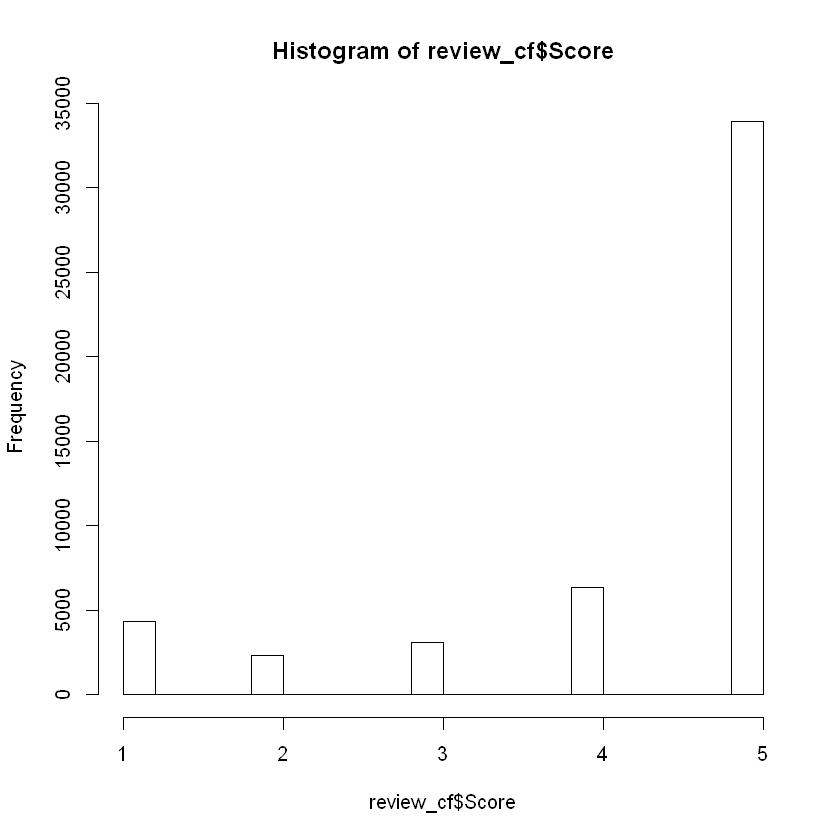

In [41]:
hist(review_cf$Score)

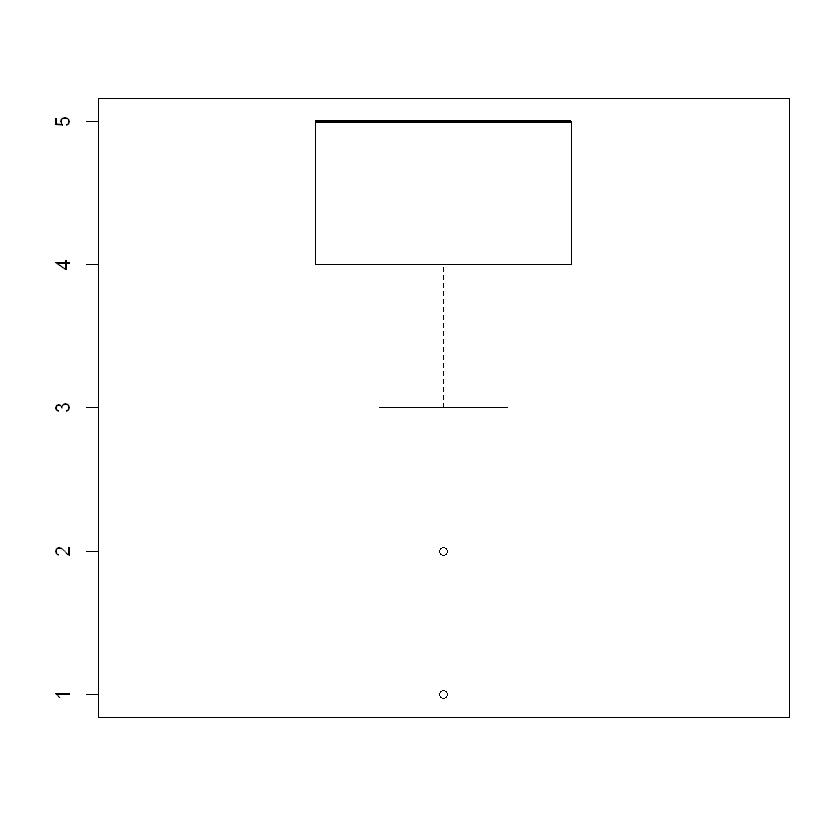

In [42]:
boxplot(review_cf$Score)

The Score is positive skewed as confirmed by the summary statistics

In [43]:
head(review_cf)

UserId         ProductId  Score
1 AMX0PJKV4PPNJ  0006641040 4    
2 AYZ0PR5QZROD1  0006641040 5    
3 A2QXYSXGQ2PKAU 0006641040 3    
4 A3KKR87BJ0C595 0006641040 5    
5 A1HKYQOFC8ZZCH 0006641040 1    
6 A3SJWISOCP31TR 0006641040 5

In [44]:
length(unique(review_final_small$UserId))
length(unique(review_final_small$ProductId))

[1] 43349

[1] 1266

In [45]:
review_final_small %>%
    group_by(UserId) %>%
    summarize(count = n()) %>%
    arrange(-count) %>%
    tail()

UserId        count
1 AZZNK89PXD006 1    
2 AZZRFMUO60L7J 1    
3 AZZTH6DJ0KSIP 1    
4 AZZV61COVM8CA 1    
5 AZZV9PDNMCOZW 1    
6 AZZVNIMTTMJH6 1

There are more user than product thus Item Based Collaborative Filtering is more efficient

## Recommender Lab IBCF

In [46]:
## RECOMMENDER LAB IBCF ##

# set data format
review_cf$UserId <- as.factor(review_cf$UserId)
review_cf$ProductId <- as.factor(review_cf$ProductId)
review_cf$Score <- as.numeric(review_cf$Score)

In [47]:
############################# code below not in use############################################

In [48]:
#review_matrix <- dcast(review_cf, ProductId ~ UserId, fun.aggregate = mean, value.var = 'Score', fill = 0)

In [49]:
#review_matrix[1:10, 30:60]

In [50]:
#rownames(review_matrix) = review_matrix[,1]

In [51]:
#review_matrix[,1] = NULL

In [52]:
#print(object.size(review_matrix), units = 'auto')

In [53]:
#dim(review_matrix)

In [54]:
#review_matrix[1:5,1:5]

In [55]:
###############################################################################################

In [56]:
# Create sparse matrix
review_spmatrix <- sparseMatrix(i = as.integer(review_cf$UserId),
                               j = as.integer(review_cf$ProductId),
                               x = review_cf$Score,
                               dimnames = list(unique(review_cf$UserId), 
                                               unique(review_cf$ProductId))
                                )

In [57]:
dim(review_spmatrix)

[1] 43349  1266

In [58]:
review_spmatrix[1:10,1:5]

10 x 5 sparse Matrix of class "dgCMatrix"
               0006641040 B00002N8SM B00004RAMS B00004RAMX B00004RAMY
AMX0PJKV4PPNJ           .          .          .          .          .
AYZ0PR5QZROD1           .          .          .          .          .
A2QXYSXGQ2PKAU          .          .          .          .          .
A3KKR87BJ0C595          .          .          .          .          .
A1HKYQOFC8ZZCH          .          .          .          .          .
A3SJWISOCP31TR          .          .          .          .          .
A3E7R866M94L0C          .          .          .          .          .
A1IJKK6Q1GTEAY          .          .          .          .          .
AJ46FKXOVC7NR           .          .          .          .          .
AVFMJ50HNO21J           .          .          .          .          .

In [59]:
# Sparse matrix has much smaller size
print(object.size(review_spmatrix), units = 'auto')

3.6 Mb


In [60]:
# format sparse matrix for recommenderlab library
review_sprrm <- as(review_spmatrix, 'realRatingMatrix')

In [61]:
review_sprrm

43349 x 1266 rating matrix of class 'realRatingMatrix' with 50000 ratings.

In [62]:
dim(review_sprrm)

[1] 43349  1266

In [63]:
print(object.size(review_sprrm), units = 'auto')

3.6 Mb


In [64]:
#image(review_sprrm, main = "Raw Ratings")

We will attempt the following models: <br>
IBCF_N_C -> Item based collaborative filtering with no normalisation with cosine similarity metric<br>
IBCF_C_C -> Item based collaborative filtering with centering and cosine similarity metric <br>
IBCF_Z_C -> Item based collaborative filtering with z score normalisation and cosine similarity metric<br>

In [65]:
# Split the data into training and testing subsets on 80/20 with up to 5 items recommended for each user ('given'), 
# any rating greater than 3 is considered positive rating
given <- 1 #refer to https://stackoverflow.com/questions/30128383/error-evaluationscheme-recommenderlab-in-r
# some of the UserId only has 1 review so the given value cannot be more than 1
rating_threshold <- 4 # set 4 and above considered positive
eval <- evaluationScheme(review_sprrm, method = 'split', train = 0.8, given = given, goodRating = rating_threshold)

In [66]:
#IBCF with cosine similarity and not normalized data for k most similar items
IBCF_N_C <- Recommender(data = getData(eval, 'train'),
                        method = "IBCF", 
                        parameter = list(normalize = NULL, 
                                         method = 'Cosine', k = 30))

In [67]:
# IBCF with cosine similarity and centered data for k most similar items
IBCF_C_C <- Recommender(data = getData(eval, 'train'), 
                        method = 'IBCF', 
                        parameter = list(normalize = "center", method = "Cosine", k = 30))

In [68]:
# IBCF with cosine similarity and z-score normalised data for k most similar item
IBCF_Z_C <- Recommender(data = getData(eval, 'train'),
                       method = 'IBCF',
                       parameter = list(normalize = "Z-score", method = 'Cosine', k = 30))

In [69]:
# Popular Model
POP <- Recommender(data = getData(eval, 'train'), method = 'POPULAR', param = list(normalize = 'center'))

In [70]:
# Evaluation of IBCF
pIBCF_N_C <- predict(IBCF_N_C, getData(eval, 'known'), type = 'ratings')
pIBCF_C_C <- predict(IBCF_C_C, getData(eval, 'known'), type = 'ratings')
pIBCF_Z_C <- predict(IBCF_Z_C, getData(eval, 'known'), type = 'ratings')

In [71]:
pPOP <- predict(POP, getData(eval, 'known'), type = 'ratings')

In [72]:
# Performance statistics
perf_stats <- rbind(
    IBCF_N_C = calcPredictionAccuracy(pIBCF_N_C, getData(eval, 'unknown')),
    IBCF_C_C = calcPredictionAccuracy(pIBCF_C_C, getData(eval, 'unknown')),
    IBCF_Z_C = calcPredictionAccuracy(pIBCF_Z_C, getData(eval, 'unknown')),
    pPOP = calcPredictionAccuracy(pPOP, getData(eval, 'unknown'))
    )

In [73]:
perf_stats

RMSE     MSE      MAE     
IBCF_N_C 4.296979 18.46403 2.396499
IBCF_C_C 3.381717 11.43601 1.946167
IBCF_Z_C 3.382152 11.43896 1.948285
pPOP     4.623808 21.37960 2.905347

So far best performing model is IBCF on cosine similarity without data normalisation

In [74]:
#rm(IBCF_N_C, IBCF_C_C, IBCF_Z_C)

In [75]:
IBCF_N_C

Recommender of type 'IBCF' for 'realRatingMatrix' 
learned using 34679 users.

In [76]:
#pred <- predict(IBCF_N_C, review_sprrm[1,])

Test

In [77]:
# predict items for user
pred<-predict(IBCF_N_C, getData(eval,'unknown'), type = 'ratings')

In [78]:
# item - item cosine similarity matrix
as(pred, 'matrix')[100:150, 200:250]

B00061EUN6 B00061EZBS B00061MUNS B00061MVTG B00062XZEU
AAI57M3OXP5NK  NA         NA         NA         NA         NA        
A1CZICCYP2M5PX NA         NA         NA         NA         NA        
A1EARN5PUVIF1S NA         NA         NA         NA         NA        
AZRJH4JFB59VC  NA         NA         NA         NA         NA        
A1U1GYM2SIA2PY NA         NA         NA         NA         NA        
A10L8O1ZMUIMR2 NA         NA         NA         NA         NA        
A2C5VLIJMDPWHI NA         NA         NA         NA         NA        
A1WP28Z1HFLX4W NA         NA         NA         NA         NA        
A2JTZI7Y58X9W5 NA         NA         NA         NA         NA        
A20LY8E9NGYA4M NA         NA         NA         NA         NA        
A31RM5QU797HPJ NA         NA         NA         NA         NA        
A1HWMNSQF14MP8 NA         NA         NA         NA         NA        
A2B3Z2QHW3V35S NA         NA         NA         NA         NA        
A6QPAO2ZF27SD  NA         NA         NA         NA         NA        
A2QOI90Y1HNTP9 NA         NA         NA         NA         NA        
A21GKWZJL8BVJ7 NA         NA         NA         NA         NA        
A1BZEGSNBB7DVS NA         NA         NA         NA         NA        
A3PJJ7MNJNBXXO NA         NA         NA         NA         NA        
A2WTQL7T70Z1H1 NA         NA         NA         NA         NA        
A1ZPALFR6ZYKRH NA         NA         NA         NA         NA        
A2RLGG5XB5ID34 NA         NA         NA         NA         NA        
A48VQ893Z2KQR  NA         NA         NA         NA         NA        
A1CAA94EOP0J2S NA         NA         NA         NA         NA        
A2SXUINNJD8R25 NA         NA         NA         NA         NA        
A23QOAXJSWIBS6 NA         NA         NA         NA         NA        
A1ZH086GZYL5MZ NA         NA         NA         NA         NA        
A86R2KZIFHKLB  NA         NA         NA         NA         NA        
A382CY938Z79EX NA         NA         NA         NA         NA        
A2Q5Y2EMS6KDWI NA         NA         NA         NA         NA        
A3GJJ634MTAJ06 NA         NA         NA         NA         NA        
A3VMD1TVFCK9KB NA         NA         NA         NA         NA        
ANEUPVXP9GKJQ  NA         NA         NA         NA         NA        
AD8X8DT1F6WMQ  NA         NA         NA         NA         NA        
A3KV0NO0TQTW3Y NA         NA         NA         NA         NA        
A3W1511URY17E4 NA         NA         NA         NA         NA        
A1C8NAHYR6Z10F NA         NA         NA         NA         NA        
A3UYD9XC1AYN9F NA         NA         NA         NA         NA        
A29WB6HYCBSTGB NA         NA         NA         NA         NA        
A1RI7KJRUURG5J NA         NA         NA         NA         NA        
A1IU7S4HCK1XK0 NA         NA         NA         NA         NA        
A2TXEW5OBF1W9K NA         NA         NA         NA         NA        
A3J9YJSYYOXK0I NA         NA         NA         NA         NA        
AH9HJFWMRF0U3  NA         NA         NA         NA         NA        
A3BJK5B7ZDKX1O NA         NA         NA         NA         NA        
A37M08KFHH3XIS NA         NA         NA         NA         NA        
A2JYDKSLX38IKZ NA         NA         NA         NA         NA        
AY22VOIZDC2RH  NA         NA         NA         NA         NA        
A3NAV2H1KZJ690 NA         NA         NA         NA         NA        
AUC1TGGMLJQLA  NA         NA         NA         NA         NA        
A1KFVRCVC9AQCB NA         NA         NA         NA         NA        
A25LBCZ5BLDPPB NA         NA         NA         NA         NA        
               B000633NXM B000633V3E B000633V3O B000633Y4A B000633Z8A ...
AAI57M3OXP5NK  NA         NA         NA         NA         NA         ...
A1CZICCYP2M5PX NA         NA         NA         NA         NA         ...
A1EARN5PUVIF1S NA         NA         NA         NA         NA         ...
AZRJH4JFB59VC  NA         NA         NA         NA         NA         ...
A1U1G

In [79]:
pred<-predict(IBCF_N_C, getData(eval,'unknown'), n= 5)

In [80]:
as(pred, "list")

$AMX0PJKV4PPNJ
[1] "B0009K77OI" "B000FQ0PUO"

$A2QXYSXGQ2PKAU
[1] "B0000CF8T1" "B000FDB3VW" "B000FFIL92" "B000G6RYNE" "B000GW46D4"

$A3E7R866M94L0C
character(0)

$A1S4A3IQ2MU7V4
character(0)

$A1C9K534BCI9GO
[1] "B0009F3SDC" "B0009TMZIM" "B000CMD63E" "B000CMF196" "B000CMIYWC"

$A3OI7ZGH6WZJ5G
character(0)

$A3RMCRB2NDTDYP
character(0)

$A367OXCD2R6MC1
character(0)

$AXVQSCC43HE99
character(0)

$AZKXR73X1CVIM
[1] "B00016LA7K" "B0007R9L4M" "B000CQ6KTM" "B000CQBZOW" "B000CQG8K8"

$A2579IQYG8Y9YF
[1] "B00061EUN6" "B0009P5EJS" "B000AYFATW" "B000BF10IA" "B000CQG8K8"

$A1NH6UGER6N9EL
[1] "B0000DID5R" "B0000DJDJZ" "B00016LA7K" "B0001EQN88" "B0001K5MGG"

$A1L227LG53GTLB
[1] "B0001CXUHW" "B0005XO2ME" "B0005ZHPFI" "B000A0VOD2" "B000EH0RTI"

$A2Z0O52PKZPQ4H
[1] "B000E4C2PI" "B000EVNWSM" "B000EVQ0NQ" "B000FVZW7K"

$A110QUC2ULFN7R
character(0)

$AQBI7DRXYGBIF
character(0)

$A1QY4OAXKSNZCT
[1] "B0002R5Q1Y"

$A5PFFF878YQ8L
[1] "B0000DIXKU" "B0001K5MGG" "B0006ZN4Z2" "B0009F3PJ4" "B0009F3QKW"

$AC3ASC0WPRFQM
[1] "B0000VLTZY" "B000DZH19K" "B000E158ES" "B000E18CVE" "B000E48IO2"

$A24RQ4UBVNQ13T
character(0)

$AP9GDCB8640MV
character(0)

$A14VJ4BQS4RQD1
[1] "B0009XSXZM" "B0009XUAX0" "B000ED9LSU" "B000K8UL4C"

$A2HWA1SN3JW1YZ
[1] "B00014JNI0" "B0009JRH1C" "B0009JRKDC" "B000ETXO8M"

$A11A9AVEM5EVU4
character(0)

$A3IHEDW36O48FF
[1] "B0001SVZGE" "B000CMF18W" "B000CMIYWM" "B000E199RK" "B000EMAZPO"

$A10XO2J8PCFGYH
character(0)

$A1YQ8XV9JDYXTK
character(0)

$A175XHWAWNSZV0
[1] "B000ETC9II"

$A3D7NKQGLKLBFO
[1] "B0001W2W62" "B000AYFAO2" "B000E283KS" "B000ED7M6I" "B000ED9LIU"

$A5MIWVIFLX74H
[1] "B00064VQO4" "B0009F3SA0" "B0009F3SAK" "B0009XSXZM" "B0009XUAX0"

$APFJVJMKAUTCW
character(0)

$A2YA5ORUK9L42T
character(0)

$A3OAFXXHLXWBK4
[1] "B0009F3SC8" "B000EDDS6Q" "B000EZMRPM" "B000EZMRQG" "B000EZSFX0"

$A363WIYGGG7GIN
[1] "B000BD0SDU" "B000E48IO2" "B000FFRTVI" "B000FFRTZO" "B000FI4O90"

$A692LD3SCC2V9
[1] "B0002DGL26" "B0002DGSRO" "B0002R1HVC" "B0007R9L4M" "B000BF54O6"

$ANOQD96JX3IR0
[1] "B0002Y121K" "B00064VQO4" "B0009F3SBY" "B000AYFAO2" "B000DZH1CM"

$A2AEXLZW7QEEHH
character(0)

$A1UGMRN67XIKGL
[1] "B0000VLTZY" "B00014CZQC" "B00017L1TG" "B0006ZN538" "B0009F3QKW"

$A3GJE3EMH71IAB
[1] "B0001ES9F8" "B0002QF27I" "B0002YW26E" "B000CRHQN0" "B000E63LME"

$A21X8J556IOC8L
[1] "B00004RBDU" "B00017LEX4" "B00017LF24" "B0001CXUHW" "B00027CL5S"

$A1UKYN3LLIE6G5
[1] "B00004S1C6" "B00014VTNW" "B0005Z7PI0" "B00060PTLO" "B000AQJRWG"

$A1AI4MFW9INLTD
character(0)

$A2OSEYOHKI9OKR
character(0)

$A1HPGGEGZX3NH
character(0)

$A1X8ETXGPI7VYS
[1] "B00014VTNW" "B0009F3QLG" "B0009F3SFK" "B0009XUAX0" "B000CMIZ12"

$A2ZJYLAIQVJWBQ
character(0)

$A7XP66PLAA5DC
[1] "B000FDKQCY"

$A1JPKOCADX9EOS
character(0)

$A2JLPPU80ZCHFO
[1] "B00017LEY8" "B000BD0SDU" "B000CQE3HS" "B000E4C2LW" "B000EDG598"

$A1OMJWOIY2K1VU
character(0)

$A344OHHYUFZBTT
[1] "B00004S1C6" "B00014IVPQ" "B00014VTNW" "B0002O0126" "B0005Z7PI0"

$AEW9SLJXVMO4Z
[1] "B0000DBN1F" "B000EHL21U" "B000FKMNK0"

$A1V1FVSTTFFYNI
character(0)

$A1VJTGZ4BDUYSG
[1] "B0000DJ89V" "B0009F3SC8" "B000CQG8K8" "B000E48IMO" "B000E671XY"

$A39RSTV7OHQCLL
[1] "B000E4C2PI" "B000EVNWSM" "B000EVQ0NQ" "B000FVZW7K"

$A2PC3BLNZ3287V
character(0)

$A3LZ710NCZ8EBI
character(0)

$A1VYQBADSAHBDW
[1] "B0002UEEAA" "B0007IQQXA" "B0009P5EJS" "B000BD0SDU" "B000CR41N8"

$A2KKMUFK8XOATN
[1] "B0009X0RA6" "B000ILI60M" "B000ILK9PM"

$A7LLIFTZVW0MD
[1] "B000FFIUDE" "B00004S1C5" "B00004S1C6" "B00016UX0K" "B00017LEXO"

$A1UL74OE5A2ZYI
[1] "B0000V1B3Y" "B0001M0Z6Q" "B00027CL5S" "B0002ML7S0" "B000EEWZG4"

$AMR2ZX47I95JJ
[1] "B0000DBN2I" "B0001EQN88" "B0001FFK40" "B0006ZN4WU" "B0006ZN4XE"

$A1NRO1GZ4S768T
character(0)

$A97FIQK61WTIJ
character(0)

$A1C5TCCR2IGKBU
character(0)

$A14DNFDIGVY04B
[1] "B000E6727O" "B000E6LBXK" "B000EDM70Y" "B000EMOD5M" "B000GG0BPW"

$A1XD7KYER6QPHK
character(0)

$A1UG8QQ8POY5YU
[1] "B00004RYGX" "B0000V1B3Y" "B0002ASMT4" "B0002NVKZ4" "B0007U5J40"

$A3U3UK88GYTP3J
character(0)

$AYKVVA7QT0OSH
character(0)

$A1X8EJ8QQ2THRO
character(0)

$A2

### Use IBCF_N_C to predict on new data

In [253]:
review_cf[review_cf$UserId == 'A26OPNLJ0JYHPH',]

UserId         ProductId  Score
215 A26OPNLJ0JYHPH B00004RAMY 4

In [256]:
# Try to recommend item to 1 specific user
#rec_item <- predict(IBCF_N_C, review_sprrm['A3IPGCVNG88DSR',], n= 5)
rec_item <- predict(IBCF_N_C, review_sprrm['A26OPNLJ0JYHPH',], n = 5)
#rec_item <- predict(IBCF_N_C, review_sprrm["AYZ0PR5QZROD1",], n= 5 )

In [257]:
# display the recommendation
as(rec_item, "list")

$A26OPNLJ0JYHPH
[1] "B00028HN5A" "B0006348H2" "B0006M13WG" "B0006Z7NOK" "B0009ETA76"

In [258]:
getRatings(rec_item)

$A26OPNLJ0JYHPH
[1] 2 2 2 2 2

In [85]:
pred_rating <- predict(IBCF_N_C, review_sprrm["A3IPGCVNG88DSR",], n= 10)

In [86]:
# display rating
as(pred_rating, "list")

$A3IPGCVNG88DSR
 [1] "B0000DID5R" "B0000GHNTK" "B0000GHXSG" "B00016UX0K" "B0002L3BYE"
 [6] "B0002L3BYO" "B0007IQQXA" "B00099XKXG" "B0009P5EJS" "B000BVY02M"

In [87]:
getRatings(pred_rating)

$A3IPGCVNG88DSR
 [1] 5 5 5 5 5 5 5 5 5 5

In [88]:
review_cf[review_final_small$UserId %in% c('AYZ0PR5QZROD1'),]

UserId        ProductId  Score
2 AYZ0PR5QZROD1 0006641040 5

In [89]:
########## Not Used #############

ratings_matrix <- review_cf %>%# Select only needed variables
select(ProductId , Description) %>% # Add a column of 1s
mutate(value = 1) %>%# Spread into user-item format
spread(Description, value, fill = 0) %>%
select(-InvoiceNo)

In [90]:
# Create a string containing 6 new products
# cust_order <- sample(review_cf$ProductId, size = 6)

In [91]:
#cust_order <- levels(droplevels(cust_order))

In [92]:
#cust_order

In [93]:
#nrow(review_cf[review_cf$ProductId %in% cust_order,])

In [94]:
#new_order_mat <- review_cf %>%
    #select(UserId,ProductId) %>%
    #unique() %>%
    #mutate(value = as.numeric(ProductId %in% cust_order))
    

In [95]:
#new_order_matrix <- sparseMatrix(i = as.numeric('new_order_mat$UserId'),
#                              j = as.numeric(new_order_mat$ProductId),
#                              x = new_order_mat$value,
#                              dimnames = list(unique(new_order_mat$UserId), 
#                                               unique(new_order_mat$ProductId))
#                                 )

In [96]:
#dim(new_order_matrix)

In [97]:
#new_order_rrm <- as(new_order_matrix, 'realRatingMatrix')

In [98]:
#new_order<- review_cf %>%
#    select(UserId, ProductId) %>%
#    unique() %>%
#    mutate(value = as.numeric(ProductId %in% cust_order)) %>%
#    spread(key = ProductId, value = value) %>%
#    as.matrix() %>%
#    as("realRatingMatrix")

In [99]:
#new_order<- review_cf %>%
#    select(UserId, ProductId) %>%
#    unique() %>%
#    mutate(value = as.numeric(ProductId %in% cust_order)) %>%
#    spread(key = ProductId, value = value) %>%
#    as.matrix()

In [100]:
#pred_new_order <- predict(IBCF_N_C, newdata = new_order, n = 10)

In [101]:
#as(pred_new_order, "list")

## Alternating Least Square on Recosystem

In [102]:
# ALTERNATING LEAST SQUARE on RECOSYSTEM

# Train test split for Recosystem ALS
smp_size <- floor(0.9 * nrow(review_cf))
train_indexes <- sample(1: nrow(review_cf), size = smp_size)
trainevents <- review_cf[train_indexes, ]; dim(trainevents)
testevents  <- review_cf[-train_indexes, ]; dim(testevents)

[1] 45000     3

[1] 5000    3

In [103]:
#testevents1  <- review_cf[-train_indexes, ]; dim(testevents)
#head(testevents1)

In [104]:
# load into recosystem format
trainset = data_memory(trainevents$UserId, trainevents$ProductId, trainevents$Score, index1= TRUE)
testset  = data_memory(testevents$UserId, testevents$ProductId, testevents$Score, index1= TRUE)

In [105]:
# get optimised factorisation using r$tune
r = Reco()
opts = r$tune(trainset, opts=list(dim=c(20, 30, 40), lrate=c(0.1,0.2), costp_l1=0, costq_l1=0, niter=40))

In [106]:
opts

$min
$min$dim
[1] 40

$min$costp_l1
[1] 0

$min$costp_l2
[1] 0.1

$min$costq_l1
[1] 0

$min$costq_l2
[1] 0.01

$min$lrate
[1] 0.2

$min$loss_fun
[1] 2.349954


$res
   dim costp_l1 costp_l2 costq_l1 costq_l2 lrate loss_fun
1   20        0     0.01        0     0.01   0.1 2.752233
2   30        0     0.01        0     0.01   0.1 2.792196
3   40        0     0.01        0     0.01   0.1 2.809713
4   20        0     0.10        0     0.01   0.1 2.593464
5   30        0     0.10        0     0.01   0.1 2.644313
6   40        0     0.10        0     0.01   0.1 2.661061
7   20        0     0.01        0     0.10   0.1 3.101464
8   30        0     0.01        0     0.10   0.1 3.139167
9   40        0     0.01        0     0.10   0.1 3.157839
10  20        0     0.10        0     0.10   0.1 3.029120
11  30        0     0.10        0     0.10   0.1 3.067863
12  40        0     0.10        0     0.10   0.1 3.074289
13  20        0     0.01        0     0.01   0.2 3.104937
14  30        0     0.01        0     0.01   0.2 2.826969
15  40        0     0.01        0     0.01   0.2 3.193950
16  20        0     0.10        0     0.01   0.2 2.840394
17  30        0     0.10        0     0.01   0.2 2.909038
18  40        0     0.10        0     0.01   0.2 2.349954
19  20        0     0.01        0     0.10   0.2 3.352275
20  30        0     0.01        0     0.10   0.2 3.391077
21  40        0     0.01        0     0.10   0.2 3.423051
22  20        0     0.10        0     0.10   0.2 3.242728
23  30        0     0.10        0     0.10   0.2 3.298930
24  40        0     0.10        0     0.10   0.2 3.333158

In [107]:
opts$min

$dim
[1] 40

$costp_l1
[1] 0

$costp_l2
[1] 0.1

$costq_l1
[1] 0

$costq_l2
[1] 0.01

$lrate
[1] 0.2

$loss_fun
[1] 2.349954

In [108]:
opts = r$tune(trainset, opts=list(dim=c(5, 10, 20), lrate=c(0.1,0.2), costp_l1=0, costq_l1=0, niter=40))

In [109]:
opts

$min
$min$dim
[1] 5

$min$costp_l1
[1] 0

$min$costp_l2
[1] 0.1

$min$costq_l1
[1] 0

$min$costq_l2
[1] 0.01

$min$lrate
[1] 0.1

$min$loss_fun
[1] 2.476987


$res
   dim costp_l1 costp_l2 costq_l1 costq_l2 lrate loss_fun
1    5        0     0.01        0     0.01   0.1 2.609122
2   10        0     0.01        0     0.01   0.1 2.644914
3   20        0     0.01        0     0.01   0.1 2.744688
4    5        0     0.10        0     0.01   0.1 2.476987
5   10        0     0.10        0     0.01   0.1 2.503589
6   20        0     0.10        0     0.01   0.1 2.597556
7    5        0     0.01        0     0.10   0.1 2.995442
8   10        0     0.01        0     0.10   0.1 3.037811
9   20        0     0.01        0     0.10   0.1 3.106464
10   5        0     0.10        0     0.10   0.1 2.938058
11  10        0     0.10        0     0.10   0.1 2.961657
12  20        0     0.10        0     0.10   0.1 3.028350
13   5        0     0.01        0     0.01   0.2 2.943426
14  10        0     0.01        0     0.01   0.2 2.965459
15  20        0     0.01        0     0.01   0.2 3.098471
16   5        0     0.10        0     0.01   0.2 2.715086
17  10        0     0.10        0     0.01   0.2 2.731294
18  20        0     0.10        0     0.01   0.2 2.849037
19   5        0     0.01        0     0.10   0.2 3.218436
20  10        0     0.01        0     0.10   0.2 3.256056
21  20        0     0.01        0     0.10   0.2 3.347223
22   5        0     0.10        0     0.10   0.2 3.076772
23  10        0     0.10        0     0.10   0.2 3.124805
24  20        0     0.10        0     0.10   0.2 3.247364

In [110]:
opts = r$tune(trainset, opts=list(dim=c(1:5), lrate=c(0.1,0.2), costp_l1=0, costq_l1=0, niter=40))

In [111]:
opts

$min
$min$dim
[1] 5

$min$costp_l1
[1] 0

$min$costp_l2
[1] 0.1

$min$costq_l1
[1] 0

$min$costq_l2
[1] 0.01

$min$lrate
[1] 0.1

$min$loss_fun
[1] 2.471146


$res
   dim costp_l1 costp_l2 costq_l1 costq_l2 lrate loss_fun
1    1        0     0.01        0     0.01   0.1 2.723933
2    2        0     0.01        0     0.01   0.1 2.645094
3    3        0     0.01        0     0.01   0.1 2.622675
4    4        0     0.01        0     0.01   0.1 2.609280
5    5        0     0.01        0     0.01   0.1 2.605618
6    1        0     0.10        0     0.01   0.1 2.636292
7    2        0     0.10        0     0.01   0.1 2.540440
8    3        0     0.10        0     0.01   0.1 2.511207
9    4        0     0.10        0     0.01   0.1 2.497323
10   5        0     0.10        0     0.01   0.1 2.471146
11   1        0     0.01        0     0.10   0.1 3.041465
12   2        0     0.01        0     0.10   0.1 3.023868
13   3        0     0.01        0     0.10   0.1 3.012834
14   4        0     0.01        0     0.10   0.1 3.009376
15   5        0     0.01        0     0.10   0.1 2.993258
16   1        0     0.10        0     0.10   0.1 2.988566
17   2        0     0.10        0     0.10   0.1 2.958782
18   3        0     0.10        0     0.10   0.1 2.941588
19   4        0     0.10        0     0.10   0.1 2.936592
20   5        0     0.10        0     0.10   0.1 2.941425
21   1        0     0.01        0     0.01   0.2 3.044436
22   2        0     0.01        0     0.01   0.2 2.988429
23   3        0     0.01        0     0.01   0.2 2.964755
24   4        0     0.01        0     0.01   0.2 2.957915
25   5        0     0.01        0     0.01   0.2 2.946100
26   1        0     0.10        0     0.01   0.2 2.840738
27   2        0     0.10        0     0.01   0.2 2.780680
28   3        0     0.10        0     0.01   0.2 2.746888
29   4        0     0.10        0     0.01   0.2 2.726912
30   5        0     0.10        0     0.01   0.2 2.701995
31   1        0     0.01        0     0.10   0.2 3.249684
32   2        0     0.01        0     0.10   0.2 3.232373
33   3        0     0.01        0     0.10   0.2 3.219412
34   4        0     0.01        0     0.10   0.2 3.227977
35   5        0     0.01        0     0.10   0.2 3.211870
36   1        0     0.10        0     0.10   0.2 3.127284
37   2        0     0.10        0     0.10   0.2 3.089257
38   3        0     0.10        0     0.10   0.2 3.090932
39   4        0     0.10        0     0.10   0.2 3.084162
40   5        0     0.10        0     0.10   0.2 3.076580

In [112]:
opts$min

$dim
[1] 5

$costp_l1
[1] 0

$costp_l2
[1] 0.1

$costq_l1
[1] 0

$costq_l2
[1] 0.01

$lrate
[1] 0.1

$loss_fun
[1] 2.471146

### Best Dim obtained

In [113]:
# Best Dim obtained
r$train(trainset, opts = opts$min)

iter      tr_rmse          obj
   0       3.2180  4.7713e+005
   1       1.3628  9.5696e+004
   2       0.6567  3.2136e+004
   3       0.4651  2.2598e+004
   4       0.4028  2.0218e+004
   5       0.3774  1.9341e+004
   6       0.3640  1.8904e+004
   7       0.3552  1.8624e+004
   8       0.3486  1.8420e+004
   9       0.3428  1.8239e+004
  10       0.3380  1.8100e+004
  11       0.3332  1.7956e+004
  12       0.3289  1.7835e+004
  13       0.3249  1.7720e+004
  14       0.3210  1.7611e+004
  15       0.3170  1.7500e+004
  16       0.3133  1.7399e+004
  17       0.3095  1.7299e+004
  18       0.3058  1.7201e+004
  19       0.3020  1.7103e+004


In [114]:
# get predictions:  this multiplies the user vectors in testset, with the item vectors in Q
testevents$prediction <- r$predict(testset, out_memory())   # out_memory means output to memory, can also use "out_file"
head(testevents)

UserId         ProductId  Score prediction
8  A1IJKK6Q1GTEAY 0006641040 5     4.26687   
10 AVFMJ50HNO21J  0006641040 4     4.26687   
22 A2ONB6ZA292PA  0006641040 5     4.26687   
30 A1S3C5OFU508P3 0006641040 4     4.26687   
36 AGQWHPNDZGUD0  0006641040 3     4.26687   
37 A25ACLV5KPB4W  0006641040 4     4.26687

### Show the ALS model new data "review_cftest"

## New dataset purely for testing

In [115]:
# New dataset not seen before purely for testing ALS model
review_cftest <- review_final[100001:100500,c(3,1,5)]

In [116]:
review_cftest$UserId <- as.factor(review_cftest$UserId)
review_cftest$ProductId <- as.factor(review_cftest$ProductId)
review_cftest$Score <- as.numeric(review_cftest$Score)

In [117]:
head(review_cftest)

UserId         ProductId  Score
100001 A2QC9920F42ORM B001EQ54IM 5    
100002 A2YEV05XY5GJ9U B001EQ54IM 5    
100003 A2Q4UX9QHLX9K8 B001EQ54IM 5    
100004 A3AGBJ6FYKE6O4 B001EQ54IM 4    
100005 A5R738LU8LSUB  B001EQ54IM 5    
100006 A1Y3OPYLRYJJF2 B001EQ54IM 5

In [118]:
review_cftestset  = data_memory(review_cftest$UserId, review_cftest$ProductId, review_cftest$Score, index1= TRUE)

In [119]:
review_cftest$prediction <- r$predict(review_cftestset, out_memory())

In [120]:
head(review_cftest, 30)

UserId         ProductId  Score prediction
100001 A2QC9920F42ORM B001EQ54IM 5     5.214603  
100002 A2YEV05XY5GJ9U B001EQ54IM 5     4.976331  
100003 A2Q4UX9QHLX9K8 B001EQ54IM 5     4.736203  
100004 A3AGBJ6FYKE6O4 B001EQ54IM 4     4.471866  
100005 A5R738LU8LSUB  B001EQ54IM 5     5.260537  
100006 A1Y3OPYLRYJJF2 B001EQ54IM 5     5.531191  
100007 A2EUBM7HTPCZJ5 B001EQ54IM 5     4.266870  
100008 A1OPLCTF66A49X B001EQ54IM 3     4.031291  
100009 A3EBHHCZO6V2A4 B001EQ54IM 4     4.722576  
100010 A3EBHHCZO6V2A4 B001EQ54M8 5     3.473611  
100011 AD369TZIKXXF0  B001EQ54M8 5     3.700089  
100012 A2FNVH31LT3MGL B001EQ54M8 5     0.871513  
100013 AEL6CQNQXONBX  B001EQ54M8 5     3.539039  
100014 A30O1KHSE4A24E B001EQ54M8 5     3.390143  
100015 AQ65PTOT3SUH5  B001EQ54M8 5     3.581703  
100016 A29IPF6KF8D5YW B001EQ54M8 1     3.590162  
100017 AWVSCPEG6CHXG  B001EQ54M8 5     3.278434  
100018 A3M330JARMFYTI B001EQ54M8 5     3.754876  
100019 ALUS3H9A378JI  B001EQ54M8 5     3.514176  
100020 A2BARFPH0SFE6P B001EQ54M8 4     4.266870  
100021 A2A9UO8RND955S B001EQ54M8 5     3.624749  
100022 A1USLMR4BJ1RH0 B001EQ54M8 5     3.033166  
100023 A1VYJUUE1MEG46 B001EQ54M8 5     3.450605  
100024 A2MQAHM7U0H643 B001EQ54M8 3     1.966664  
100025 ARB94UKTX6OVK  B001EQ54M8 1     4.266870  
100026 A2S6RZBC13UD7O B001EQ54M8 5     3.576923  
100027 AMWP1S4JBQRG7  B001EQ54M8 4     2.666174  
100028 AJJRE9K743P0V  B001EQ54M8 4     4.266870  
100029 A18N5K4YXW5IDR B001EQ54M8 5     2.790343  
100030 A2CND8HXI5RW01 B001EQ54M8 5     3.345514

### MF manual approach to allow user to select a number of product and be recommended another 5 products

In [121]:
## Matrix Factorisation Approach to recommend products to user given the product info provided by user
#get factorised matrices
r$output() # exports the two matrix to the current directory (as mat_P.txt, mat_Q.txt)


P matrix generated at mat_P.txt
Q matrix generated at mat_Q.txt


$P
NULL

$Q
NULL

In [122]:
P = as.matrix(read.table("mat_P.txt")) # user
Q = as.matrix(read.table("mat_Q.txt")) # product

In [123]:
rownames(P) = as.factor(unique(review_cf$UserId))
rownames(Q) = as.factor(unique(review_cf$ProductId))
head(P) # the user factors matrix, rows = user, columns are the latent features
head(Q) # the item factors matrix, rows = items, columns are the latent features

V1       V2       V3       V4       V5      
AMX0PJKV4PPNJ  0.515888 0.550285 0.496960 0.538007 0.842800
AYZ0PR5QZROD1  0.804505 0.671016 0.524820 0.350639 0.707465
A2QXYSXGQ2PKAU 0.474198 0.184183 0.153794 0.108099 0.481764
A3KKR87BJ0C595 0.571538 0.579517 0.621114 0.715332 0.978925
A1HKYQOFC8ZZCH 0.475727 0.891380 0.450299 0.582354 0.602851
A3SJWISOCP31TR 0.722720 0.671898 0.476050 0.709613 0.672825

V1      V2      V3      V4       V5      
0006641040 1.06340 1.93989 1.79465 1.940840 1.507100
B00002N8SM 1.62484 1.39967 1.32289 0.517738 0.916881
B00004RAMS 1.79457 1.79902 1.41540 1.331780 1.654480
B00004RAMX 1.49878 1.51564 1.15497 1.183490 1.738680
B00004RAMY 1.47504 1.57416 1.80498 1.675490 1.836290
B00004RBDU 2.07647 1.37843 1.78957 1.148540 1.786020

In [259]:
### Testing the ALS Recommender ###

In [125]:
# Create a string containing 5 new products
cust_order <- sample(unique(review_cf$ProductId), size = 5)

In [126]:
cust_order <- levels(droplevels(cust_order))

In [127]:
cust_order

[1] "B0007LXU8G" "B000E199RK" "B000EVIDUY" "B000F0FZBE" "B000FBQ594"

In [128]:
# empty matrix container for the final result
result = matrix(nrow = 0, ncol = 2)

#for each item in the cust_order, do a matrix multiplication to find top 5 user based on rating
for (item in cust_order){
    T = as.matrix(Q[item,])
    prats = P %*% T
    prats= prats[order(prats, decreasing = TRUE),]
    similar_user = names(prats)[1:5]
    #print(similar_user)
    
    # for each user, do a matrix multiplication back to find relevant products
    for (name in similar_user){
        # empty temporary matrix
        mat = ''
        T2 = as.matrix(P[name,])
        prats2 = Q %*% T2
        prats2 = prats2[order(prats2, decreasing = TRUE),]
        similar_product = prats2[1:5]
        mat <- cbind(as.vector(names(similar_product)), as.vector(similar_product))
        #print(mat)
        #retutn a matrix
        result <- rbind(result, mat)
    }
    
}

In [129]:
#name the matrix
colnames(result) <- c('ProductId', 'Rating')

In [130]:
dim(result)

[1] 125   2

In [131]:
result_df <- as.data.frame(result[order(result[,2], result[,1], decreasing = TRUE),])

In [132]:
# convert Rating from factor to numeric, extra step in between, convert to char before numeric
result_df$Rating <- as.numeric(as.character(result_df$Rating))

In [133]:
head(result_df,10)

ProductId  Rating  
1  B000FK8VHE 8.150487
2  B000FK8VHE 8.150487
3  B000FK8VHE 8.150487
4  B000FK8VHE 8.150487
5  B000FK8VHE 8.150487
6  B000FK8VHE 8.083952
7  B000FK8VHE 8.083952
8  B000FK8VHE 8.050634
9  B000FK8VHE 8.037793
10 B000FK8VHE 8.023945

In [134]:
# groupby and get the mean rating of each product, sort descending
cf_recom_product <- result_df %>%
    group_by(ProductId) %>%
    summarize(meanRating = mean(Rating)) %>%
    arrange(-meanRating) %>%
    mutate(Rank = order(meanRating, decreasing = TRUE))

In [135]:
# top 5 relevant products
cf_recom_product

ProductId  meanRating Rank
1  B000FK8VHE 8.036105    1  
2  B000FDDESC 7.849056    2  
3  B000F3WSBQ 7.820525    3  
4  B000FDBRGI 7.765319    4  
5  B000FBM3YK 7.747404    5  
6  B000E46GEG 7.719597    6  
7  B0009K77OI 7.714113    7  
8  B000IOC7RW 7.712222    8  
9  B000ED9L9E 7.708977    9  
10 B0009X0RA6 7.667980   10  
11 B000FK7PQW 7.657840   11  
12 B0002QX3Q0 7.607215   12  
13 B000GFYRJE 7.596560   13

In [136]:
#################### CODE BLOCK BUILDING ###############

In [137]:
# Create a string containing 6 new products
cust_order1 <- sample(review_cf$ProductId, size = 1)

In [138]:
cust_order1 <- levels(droplevels(cust_order1))

In [139]:
target = cust_order1

In [140]:
T = as.matrix(Q[target,]) ; T

[,1]   
V1 1.64522
V2 1.81584
V3 1.51583
V4 1.50561
V5 2.12161

In [141]:
head(P)

V1       V2       V3       V4       V5      
AMX0PJKV4PPNJ  0.515888 0.550285 0.496960 0.538007 0.842800
AYZ0PR5QZROD1  0.804505 0.671016 0.524820 0.350639 0.707465
A2QXYSXGQ2PKAU 0.474198 0.184183 0.153794 0.108099 0.481764
A3KKR87BJ0C595 0.571538 0.579517 0.621114 0.715332 0.978925
A1HKYQOFC8ZZCH 0.475727 0.891380 0.450299 0.582354 0.602851
A3SJWISOCP31TR 0.722720 0.671898 0.476050 0.709613 0.672825

In [142]:
prats = P %*% (T)

In [143]:
head(prats)

[,1]    
AMX0PJKV4PPNJ  5.199407
AYZ0PR5QZROD1  5.366474
A2QXYSXGQ2PKAU 2.532603
A3KKR87BJ0C595 6.088027
A1HKYQOFC8ZZCH 5.239668
A3SJWISOCP31TR 5.626576

In [144]:
prats= prats[order(prats, decreasing = TRUE),]

In [145]:
head(prats)

AO5CK30V7PZJB   AT9XBLUX6N2T A1HBMT921Z4VHB A1D7LXBB858MZZ A19J97YZF9IR5K 
      7.437124       7.375477       7.347540       7.347173       7.345850 
A2ALPGBIZVQ5MH 
      7.320440

In [146]:
#top 1 similar user
similar_user <- names(prats)[1]

In [147]:
similar_user

[1] "AO5CK30V7PZJB"

In [148]:
T2 = as.matrix(P[similar_user,]) ; T2

[,1]    
V1 0.946903
V2 0.975066
V3 1.054670
V4 0.531137
V5 0.806138

In [149]:
prats2 = Q %*% (T2)

In [150]:
prats2 = prats2[order(prats2[,1], decreasing = TRUE),]

In [151]:
# top 5 recommended products
prats2[1:5]

B000FK8VHE B000FK7PQW B000E46GEG B000FBM3YK B000FDBRGI 
  7.998028   7.820955   7.815699   7.785067   7.765319

In [152]:
########################### END OF CODE BLOCK #########################

In [153]:
rm(opts)
rm(IBCF_C_C)
rm(IBCF_Z_C)
rm(POP)

In [154]:
rm(reviews)

## Content Based Recommender

In [155]:
# Content Based Recommender
#review_cb <- ungroup(review_final_small) %>%
    #mutate(combine_summary = paste(Summary, Text, sep = ' '))

In [156]:
# copy the data over
review_cb <- review_final_small

In [157]:
#review_cb <- ungroup(review_final_small) %>%
#    group_by(ProductId) %>%
#    mutate(combine_summary2 = paste(Summary, collapse= ' '))

In [158]:
review_cb[duplicated(review_cb$combine_summary),]

ProductId Id UserId ProfileName Score Summary Text combine_summary count

In [159]:
review_cb[review_cb$combine_summary == "very good This product is a very health snack for your pup as it is made of 100% beef liver. My puppy does all of his tricks to get this treat. It is a little pricy but the container is large so it should last a long time as long as you don't overfeed.",]

ProductId  Id    UserId        ProfileName          Score Summary  
5305 B000255OIG 15479 AU2LNDRGFOS8J Janice Garner ""jg"" 5     very good
     Text                                                                                                                                                                                                                                              
5305 This product is a very health snack for your pup as it is made of 100% beef liver. My puppy does all of his tricks to get this treat. It is a little pricy but the container is large so it should last a long time as long as you don't overfeed.
     combine_summary                                                                                                                                                                                                                                             
5305 very good This product is a very health snack for your pup as it is made of 100% beef liver. My puppy does all of his tricks to get this treat. It is a little pricy but the container is large so it should last a long time as long as you don't overfeed.
     count
5305 167

In [160]:
review_cb <- review_cb[order(review_cb$ProductId), ]

In [161]:
review_cb_prod <- review_cb[,c(1,8,9)]

In [162]:
review_cb_prod <- review_cb_prod[order(review_cb_prod$ProductId),]

In [163]:
#collapse the summary to each ProductId
review_cb_prod2 <- aggregate(combine_summary ~ ProductId, data = review_cb_prod, FUN = paste, collapse = " ")


In [164]:
dim(review_cb_prod2)

[1] 1266    2

In [165]:
#review_cb_prod2[review_cb_prod2$ProductId == '0006641040',]

In [166]:
nrow(review_cb_prod2[duplicated(review_cb_prod2$combine_summary),])

[1] 0

In [167]:
# check lengths
length(unique(review_cb_prod2$combine_summary))
length(unique(review_cb_prod2$ProductId))

[1] 1266

[1] 1266

In [168]:
# Remove non ASCII Character
review_cb_prod2$combine_summary <- iconv(review_cb_prod2$combine_summary, "UTF-8", "ASCII",sub='')

In [169]:
mystopwords = c(stopwords('english'), 'the', 'and', 'will', 'product')

In [170]:
desc_corpus <- VCorpus(VectorSource(review_cb_prod2$combine_summary))

In [171]:
desc_corpus <- tm_map(desc_corpus, content_transformer(tolower))

In [172]:
desc_corpus <- tm_map(desc_corpus, removeNumbers)

In [173]:
desc_corpus <- tm_map(desc_corpus, removeWords, mystopwords)
desc_corpus <- tm_map(desc_corpus, removePunctuation)

In [174]:
desc_corpus <- tm_map(desc_corpus, stemDocument)
desc_corpus <- tm_map(desc_corpus, removeWords, mystopwords)
desc_corpus <- tm_map(desc_corpus, stripWhitespace)

In [175]:
for(i in 1:3){
    print(desc_corpus[[i]][1])
}

$content
[1] "read read twice read chicken soup rice day person say chicken soup probabl go follow word soul mayb teenag soul use way can rememb time person said chicken soup word follow enthusiast rice power mauric sendak catchi children book pleas report care read book today find dimish jot term frolicksom fun book led whirlwind chicken soup year host boy bear littl resembl sendak great rhyme tale pierr look demeanor catchi flounci bounci combo soup peopl love br br ostens book meant teach children differ month year month get rhythmic poem accompani illustr fair simpl pen ink draw occasion splash blue vari shade yellow gray green may wonder author ever hope come twelv high origin souprel poem mean honest much say even fanciest soup let alon chicken soup rice quit lot happen cold winter month soup sup slide ice celebr birthday snowman gusti gale whale spring robin nest soup soup cure droop rose soup stolen jealous march wind hero postul potenti joy come cook pot stew soup odd enough b

In [176]:
#creating the matrix
dtm <- DocumentTermMatrix(desc_corpus)
dtm_ti <- weightTfIdf(dtm)
dtm_ti

<<DocumentTermMatrix (documents: 1266, terms: 43011)>>
Non-/sparse entries: 693998/53757928
Sparsity           : 99%
Maximal term length: 93
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

### Improve Sparsity

In [177]:
dtm_ti2 = removeSparseTerms(dtm_ti, 0.99)

In [178]:
dtm_ti2

<<DocumentTermMatrix (documents: 1266, terms: 5050)>>
Non-/sparse entries: 617118/5776182
Sparsity           : 90%
Maximal term length: 14
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

Warning message in brewer.pal(1, "Dark2"):
"minimal value for n is 3, returning requested palette with 3 different levels
"

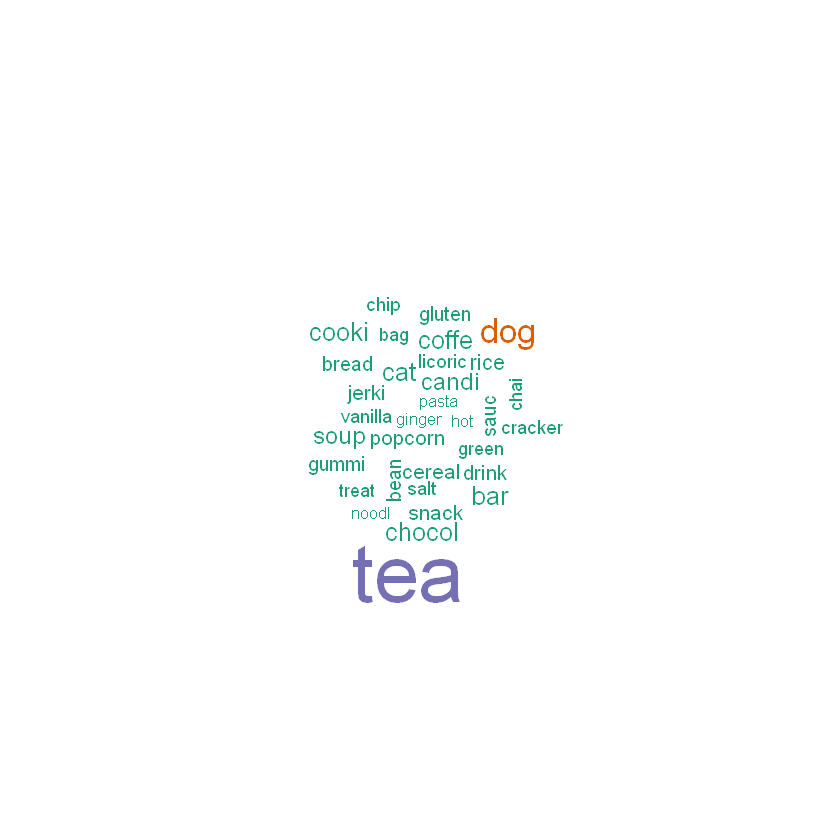

In [179]:
freq = data.frame(sort(colSums(as.matrix(dtm_ti2)), decreasing=TRUE))
wordcloud(rownames(freq), freq[,1], max.words=100, colors=brewer.pal(1, "Dark2"))

In [180]:
gc()

used      (Mb)   gc trigger (Mb)   max used  (Mb)  
Ncells   5065030  270.6   9425312   503.4   9425312  503.4
Vcells 197529384 1507.1 435853127  3325.3 435848989 3325.3

## Compute Cosine Similarity

In [181]:
## Compute cosine similarity
# slam package for cosine similarity computation
sim_mat_cos <- crossprod_simple_triplet_matrix(t(dtm_ti2))/(sqrt(col_sums(t(dtm_ti2)^2) %*% t(col_sums(t(dtm_ti2)^2))))

In [182]:
length(unique(review_cb_prod2$ProductId))

[1] 1266

In [262]:
dim(sim_mat_cos)[1]

[1] 1266

In [183]:
#assign colnames and rownames to the sim_mat_cos
rownames(sim_mat_cos) <- unique(review_cb_prod2$ProductId)
colnames(sim_mat_cos) <- unique(review_cb_prod2$ProductId)

In [184]:
#sim_mat_cos[1:5,1:30]

In [185]:
## Function to return a prediction matrix, cannot get output out, need some working ###
#recProd = function (simm, prod, k) {
#    recom = matrix(ncol =2, nrow = 0)
#    for (i in cust_order){
#        output = ''
#        result <- sort(simm[, i], decreasing = TRUE)[2:(k+1)]
#        output <- cbind(as.vector(names(result)), as.vector((result)))
#        recom <- rbind(recom, output)
#        }
#    #print(recom)
#    return(recom)
#    }

In [186]:
#sort(sim_mat_cos[, 'B00004RBDZ'], decreasing = TRUE)[2:(5+1)]

In [187]:
k = 5 # number of product recommended
simm = sim_mat_cos 
recom = matrix(ncol =2, nrow = 0)
for (i in cust_order){
    output = ''
    result <- sort(simm[, i], decreasing = TRUE)[2:(k+1)]
    output <- cbind(as.vector(names(result)), as.vector((result)))
    recom <- rbind(recom, output)
    }

In [188]:
colnames(recom) <- c('ProductId', 'Rating')

In [189]:
cb_recom <- as.data.frame(recom[order(recom[,2], recom[,1], decreasing = TRUE),])

In [190]:
# convert Rating from factor to numeric, extra step in between, convert to char before numeric
cb_recom$Rating <- as.numeric(as.character(cb_recom$Rating))

In [191]:
head(cb_recom,10)

ProductId  Rating   
1  B000DZKKK2 0.9265112
2  B000GZYAN2 0.8958944
3  B000G8399A 0.8851418
4  B000FBM3YK 0.8262424
5  B000FNB3AI 0.8200746
6  B000EHP62G 0.8188122
7  B0007LXU9A 0.8166922
8  B000EHNCZ4 0.8121174
9  B000EUJK5W 0.7833571
10 B000AY9U20 0.7688608

In [192]:
# groupby and get the mean rating of each product, sort descending
cb_recom_product <- cb_recom %>%
    group_by(ProductId) %>%
    summarize(meanRating = mean(Rating)) %>%
    arrange(-meanRating) %>%
    mutate(Rank = order(meanRating, decreasing = TRUE))

In [193]:
# all relevant products
cb_recom_product

ProductId  meanRating Rank
1  B000DZKKK2 0.9265112   1  
2  B000GZYAN2 0.8958944   2  
3  B000G8399A 0.8851418   3  
4  B000FBM3YK 0.8262424   4  
5  B000FNB3AI 0.8200746   5  
6  B000EHP62G 0.8188122   6  
7  B0007LXU9A 0.8166922   7  
8  B000EHNCZ4 0.8121174   8  
9  B000EUJK5W 0.7833571   9  
10 B000AY9U20 0.7688608  10  
11 B000I1RGQC 0.7681796  11  
12 B000EHL21U 0.7664317  12  
13 B000DZH1CM 0.7617616  13  
14 B000FDKQCO 0.7468297  14  
15 B0000DBN1F 0.7000389  15  
16 B000EUIZBM 0.6775898  16  
17 B0000DBN2I 0.6772265  17  
18 B000E130DY 0.6758881  18  
19 B0000C69FB 0.6740643  19  
20 B000GZU7QQ 0.4386062  20  
21 B000HDKZK0 0.4383839  21  
22 B000KGW2BY 0.2325221  22  
23 B000H225TU 0.1788643  23  
24 B000K8T3OQ 0.1613348  24  
25 B000EUHG9Y 0.1521885  25

In [194]:
#names(result)

In [195]:
#result_i <- names(result)
#head(result_i)

In [196]:
# create tags for the product
#m1 <- as.matrix(dtm_ti2); dim(m1) # 679 rows, 6392 columns


In [197]:
# Obtain top 5 key words for each product
#tag <- t(apply(m1, 1, FUN = function(x) colnames(m1)[order(-x)[1:5]]))
#tag_unite <- unite(data.frame(tag), "tag", 1:5, sep = " ")

In [198]:
#saveRDS(sim_mat_cos, "./sim_mat_cos.rds")

In [199]:
#recProd = function (simm, prod, k) {
#    found <- sort(simm[, prod], decreasing = TRUE)[2:(k+1)]
#    print(found)
#    cat(paste0("Selected product : <title>", colnames(review_cb_prod2[prod,1])))
#    cat(paste0("Selected product: <title> ", review_cb_prod2[prod, 1]))
#    cat("\nRecommended products:\n")
#    resindex <- names(found)
#    print(resindex)
#    for (i in 1:k) {
#        cat(paste0("\n",i,"-", resindex[i], " <ProductId> ", 
#                   review_cb_prod2[resindex[i], 1], 
#                   "\n<tags> ", 
#                   tag_unite[result_i[i],]))
#    }
#}

In [200]:
review_final[review_final$ProductId == '0006641040',]

ProductId  Id     UserId        
1  0006641040 150493 AMX0PJKV4PPNJ 
2  0006641040 150494 AYZ0PR5QZROD1 
3  0006641040 150495 A2QXYSXGQ2PKAU
4  0006641040 150496 A3KKR87BJ0C595
5  0006641040 150497 A1HKYQOFC8ZZCH
6  0006641040 150498 A3SJWISOCP31TR
7  0006641040 150499 A3E7R866M94L0C
8  0006641040 150500 A1IJKK6Q1GTEAY
9  0006641040 150501 AJ46FKXOVC7NR 
10 0006641040 150502 AVFMJ50HNO21J 
11 0006641040 150503 A3R5XMPFU8YZ4D
12 0006641040 150504 AQEYF1AXARWJZ 
13 0006641040 150505 A2PTSM496CF40Z
14 0006641040 150506 A2IW4PEEKO2R0U
15 0006641040 150507 A1S4A3IQ2MU7V4
16 0006641040 150508 AZGXZ2UUK6X   
17 0006641040 150509 A3CMRKGE0P909G
18 0006641040 150510 AM1MNZMYMS7D8 
19 0006641040 150511 A1C9K534BCI9GO
20 0006641040 150512 A1DJXZA5V5FFVA
21 0006641040 150513 ASH0DZQQF6AIZ 
22 0006641040 150514 A2ONB6ZA292PA 
23 0006641040 150515 A2RTT81R6Y3R7X
24 0006641040 150516 A3OI7ZGH6WZJ5G
25 0006641040 150517 ABW4IC5G5G8B5 
26 0006641040 150518 AK1L4EJBA23JF 
27 0006641040 150519 A12HY5OZ2QNK4N
28 0006641040 150520 ADBFSA9KTQANE 
29 0006641040 150521 A3RMCRB2NDTDYP
30 0006641040 150522 A1S3C5OFU508P3
31 0006641040 150523 A2P4F2UO0UMP8C
32 0006641040 150524 ACITT7DI6IDDL 
33 0006641040 150525 A2QID6VCFTY51R
34 0006641040 150526 A3E9QZFE9KXH8J
35 0006641040 150527 A367OXCD2R6MC1
36 0006641040 150528 AGQWHPNDZGUD0 
37 0006641040 150529 A25ACLV5KPB4W 
   ProfileName                                       Score
1  E. R. Bird ""Ramseelbird""                        4    
2  Mother of 3 girls                                 5    
3  Support for Providers                             3    
4  Gretchen Goodfellow ""Lover of children's lit""   5    
5  Maria Apolloni ""lanarossa""                      1    
6  R. J. Wells                                       5    
7  L. Barker ""simienwolf""                          5    
8  A Customer                                        5    
9  Nicholas A Mesiano                                5    
10 Jane Doe                                          4    
11 Her Royal Motherliness ""Nana""                   5    
12 Les Sinclair ""book maven""                       4    
13 Jason A. Teeple ""Nobody made a greater mistak... 4    
14 Tracy                                             4    
15 sally sue ""sally sue""                           4    
16 Catherine Hallberg ""(Kate)""                     5    
17 Teresa                                            5    
18 Dr. Joshua  Grossman                              5    
19 Laura Purdie Salas                                4    
20 A. Conway                                         5    
21 tessarat                                          5    
22 Rosalind Matzner                                  5    
23 Lindylu                                           5    
24 Mary Jane Rogers ""Maedchen""                     5    
25 kevin clark                                       5    
26 L. M. Kraus                                       5    
27 Elizabeth H. Roessner                             5    
28 James L. Hammock ""Pucks Buddy""                  5    
29 Carol Carruthers                                  5    
30 Charles Ashbacher                                 4    
31 Elizabeth A. Curry ""Lovely Librarian""           4    
32 shari zychinski                                   5    
33 Rick                                              5    
34 R. Mitchell                                       1    
35 Laurel ""I love the internet.""                   3    
36 Bolt81                                            3    
37 Matt Hetling ""Matt""                             4    
   Summary                                                      
1  Read it once. Read it twice. Reading Chicken Soup With Rice  
2  Family favorite                                              
3  Disappointed                                                 
4  You'll use it once, you'll use it twice                      
5  The story is great, the softcover book is disappointing      
6  

### Hybrid Recommendation

In [201]:
#### Hybrid Recommender #####

In [202]:
#Check for intersect of the recommendations
common <- intersect(cf_recom_product$ProductId, cb_recom_product$ProductId)

In [203]:
common

[1] "B000FBM3YK"

In [204]:
cf_recom_product[cf_recom_product$ProductId == common,]

ProductId  meanRating Rank
1 B000FBM3YK 7.747404   5

In [205]:
cb_recom_product[cb_recom_product$ProductId == common,]

ProductId  meanRating Rank
1 B000FBM3YK 0.8262424  4

In [206]:
#normalize cf_recom_product and cb_recom_product
cf_recom_product$meanRating = with(cf_recom_product, (meanRating - min(meanRating)) / (max(meanRating) - min(meanRating)))
cb_recom_product$meanRating = with(cb_recom_product, (meanRating - min(meanRating)) / (max(meanRating) - min(meanRating)))

In [207]:
cf_recom_product

ProductId  meanRating Rank
1  B000FK8VHE 1.00000000  1  
2  B000FDDESC 0.57445018  2  
3  B000F3WSBQ 0.50953916  3  
4  B000FDBRGI 0.38394143  4  
5  B000FBM3YK 0.34318295  5  
6  B000E46GEG 0.27992039  6  
7  B0009K77OI 0.26744411  7  
8  B000IOC7RW 0.26314021  8  
9  B000ED9L9E 0.25575852  9  
10 B0009X0RA6 0.16248798 10  
11 B000FK7PQW 0.13941765 11  
12 B0002QX3Q0 0.02424142 12  
13 B000GFYRJE 0.00000000 13

In [208]:
cb_recom_product

ProductId  meanRating Rank
1  B000DZKKK2 1.00000000  1  
2  B000GZYAN2 0.96045994  2  
3  B000G8399A 0.94657346  3  
4  B000FBM3YK 0.87050775  4  
5  B000FNB3AI 0.86254231  5  
6  B000EHP62G 0.86091196  6  
7  B0007LXU9A 0.85817413  7  
8  B000EHNCZ4 0.85226605  8  
9  B000EUJK5W 0.81512343  9  
10 B000AY9U20 0.79640218 10  
11 B000I1RGQC 0.79552242 11  
12 B000EHL21U 0.79326521 12  
13 B000DZH1CM 0.78723397 13  
14 B000FDKQCO 0.76795016 14  
15 B0000DBN1F 0.70752211 15  
16 B000EUIZBM 0.67853010 16  
17 B0000DBN2I 0.67806102 17  
18 B000E130DY 0.67633251 18  
19 B0000C69FB 0.67397716 19  
20 B000GZU7QQ 0.36989446 20  
21 B000HDKZK0 0.36960736 21  
22 B000KGW2BY 0.10374682 22  
23 B000H225TU 0.03445039 23  
24 B000K8T3OQ 0.01181194 24  
25 B000EUHG9Y 0.00000000 25

In [211]:
# combine the normalized products from each recommender system
combi_prod_recom <- rbind(cf_recom_product[,1:2], cb_recom_product[,1:2])

In [219]:
# Combined normalized products recommendation, sorted descending by meanRating
combi_prod_recom <- combi_prod_recom[order(combi_prod_recom$meanRating, decreasing = TRUE),]
#combi_prod_recom

In [216]:
# total number of items
nrow(combi_prod_recom)

[1] 38

In [250]:
# recommend items from top 5, middle 3 and bottom 2 of the list to introduce a mix
combi_recom_mix <- combi_prod_recom[c(1:5, 
                                      (nrow(combi_prod_recom)/2):(nrow(combi_prod_recom)/2+2),
                                      (nrow(combi_prod_recom)-1): nrow(combi_prod_recom)),
                                   ]

In [251]:
combi_recom_mix

ProductId  meanRating
1  B000FK8VHE 1.0000000 
2  B000DZKKK2 1.0000000 
3  B000GZYAN2 0.9604599 
4  B000G8399A 0.9465735 
5  B000FBM3YK 0.8705077 
6  B000E130DY 0.6763325 
7  B0000C69FB 0.6739772 
8  B000FDDESC 0.5744502 
9  B000GFYRJE 0.0000000 
10 B000EUHG9Y 0.0000000

In [214]:
cust_order

[1] "B0007LXU8G" "B000E199RK" "B000EVIDUY" "B000F0FZBE" "B000FBQ594"